# Практика

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Выполните клетку ниже

In [ ]:
!wget https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv .

--2021-04-09 08:53:26--  https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv
Resolving web.stanford.edu (web.stanford.edu)... 171.67.215.200, 2607:f6d0:0:925a::ab43:d7c8
Connecting to web.stanford.edu (web.stanford.edu)|171.67.215.200|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 44225 (43K) [text/csv]
Saving to: ‘titanic.csv’

titanic.csv         100%[===================>]  43.19K  --.-KB/s    in 0.1s    

2021-04-09 08:53:26 (309 KB/s) - ‘titanic.csv’ saved [44225/44225]

--2021-04-09 08:53:26--  http://./
Resolving . (.)... failed: No address associated with hostname.
wget: unable to resolve host address ‘.’
FINISHED --2021-04-09 08:53:26--
Total wall clock time: 0.5s
Downloaded: 1 files, 43K in 0.1s (309 KB/s)


## Задание 1
Прочитайте файл в датафрейм, так, чтобы появились корректные колонки без каких-либо дополнительных действий, и отобразите первые 5 строчек

In [ ]:
df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## Задание 2
Вывести имена всех выживших детей и их количество (у детей возраст < 18)

In [ ]:
df_children = df[(df['Age'] < 18) & (df['Survived'] == 1)]['Name']
print(f'List of children:\n{df_children}\n')
print(f'Count of children: {len(df_children)}')

List of children:
9           Mrs. Nicholas (Adele Achem) Nasser
10              Miss. Marguerite Rut Sandstrom
22                          Miss. Anna McGowan
39                  Miss. Jamila Nicola-Yarred
42     Miss. Simonne Marie Anne Andree Laroche
                        ...                   
826     Mrs. Antoni (Selini Alexander) Yasbeck
827             Master. George Sibley Richards
849                   Miss. Mary Conover Lines
865             Master. Harold Theodor Johnson
871                   Miss. Adele Kiamie Najib
Name: Name, Length: 65, dtype: object

Count of children: 65


## Задание 3
Сделайте индексом колонку Name

In [ ]:
df_name = df.copy()
df_name.set_index('Name')

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
Name,,,,,,,
Mr. Owen Harris Braund,0,3,male,22.0,1,0,7.2500
Mrs. John Bradley (Florence Briggs Thayer) Cumings,1,1,female,38.0,1,0,71.2833
Miss. Laina Heikkinen,1,3,female,26.0,0,0,7.9250
Mrs. Jacques Heath (Lily May Peel) Futrelle,1,1,female,35.0,1,0,53.1000
Mr. William Henry Allen,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
Rev. Juozas Montvila,0,2,male,27.0,0,0,13.0000
Miss. Margaret Edith Graham,1,1,female,19.0,0,0,30.0000
Miss. Catherine Helen Johnston,0,3,female,7.0,1,2,23.4500


In [ ]:
data

## Задание 4
Выберите возраст, и колонку Survived всех людей у которых в имени есть слово Henry

In [ ]:
df[['Age','Survived']][df['Name'].str.contains('Henry')]

,Age,Survived
4,35.0,0
12,20.0,0
51,49.0,1
61,45.0,0
158,5.0,0
175,5.0,0
208,40.0,1
211,22.0,0
221,51.0,0
229,35.0,1


## Задание 5
Посчитайте среднюю выживаемость в зависимости от приставки в имени.

*Подсказка: приставка -- первое слово, или то слово, которое обозначается через точку (см результат для Henry). Воспользуйтесь groupby и строковыми методами работы .str*

In [ ]:
df_surv = df.copy()
df_surv['Name'] = df['Name'].str.split(' ', expand=True)
df_surv = df_surv.groupby('Name')['Survived'].mean()
df_surv


Name
Capt.        0.000000
Col.         0.500000
Don.         0.000000
Dr.          0.428571
Jonkheer.    0.000000
Lady.        1.000000
Major.       0.500000
Master.      0.575000
Miss.        0.697802
Mlle.        1.000000
Mme.         1.000000
Mr.          0.157895
Mrs.         0.792000
Ms.          1.000000
Rev.         0.000000
Sir.         1.000000
the          1.000000
Name: Survived, dtype: float64

## Задание 6
Постройте общее распределение выживших и невыживших

Count of survivors: 342
Count of not survivors: 545



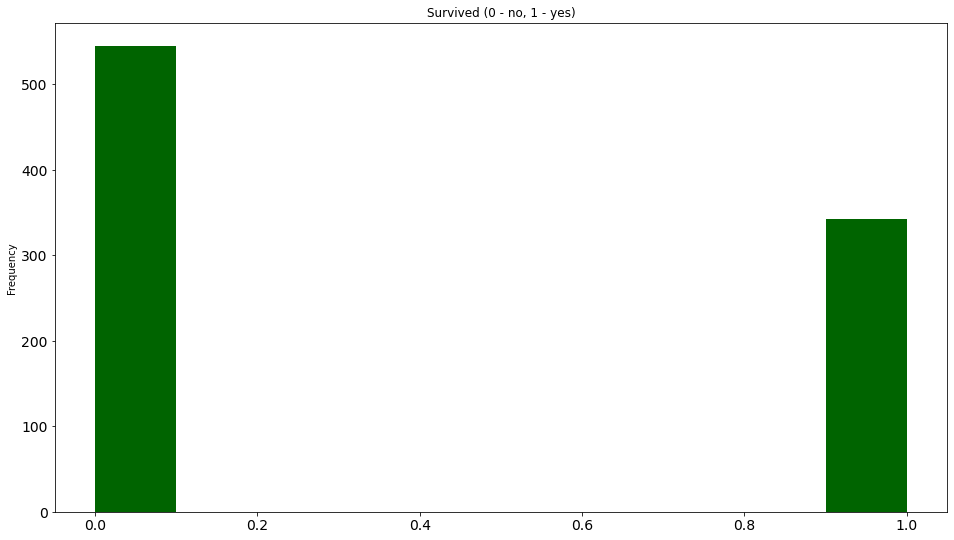

In [ ]:
df2 = df.groupby('Survived')
print(f'Count of survivors: {len(df2.groups[1])}')
print(f'Count of not survivors: {len(df2.groups[0])}\n')
df['Survived'].plot.hist(figsize=(16,9), title='Survived (0 - no, 1 - yes)', fontsize=14, color='darkgreen')

## Задание 7
С помощью pairplot постройте попарные график с раскраской по полю Survived.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


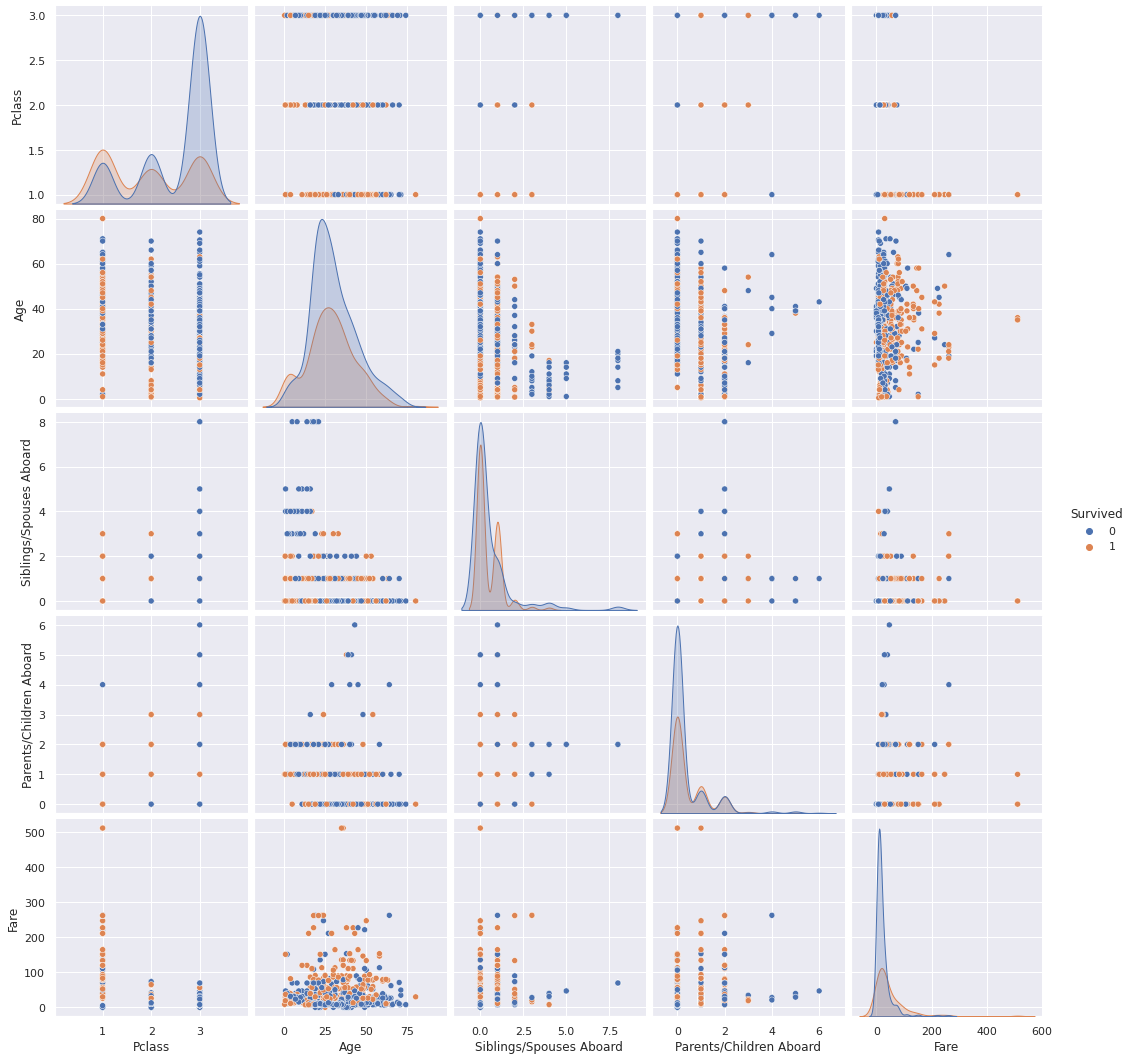

In [ ]:
import seaborn as sns
sns.pairplot(df, hue="Survived", size=3)

## Задание 9
Точки накладываются друг на друга, не очень понятно что происходит, найдите способ отобразить точки с параметром прозрачности и снова постройте pairplot.
 
*Подсказка: гугл.*

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


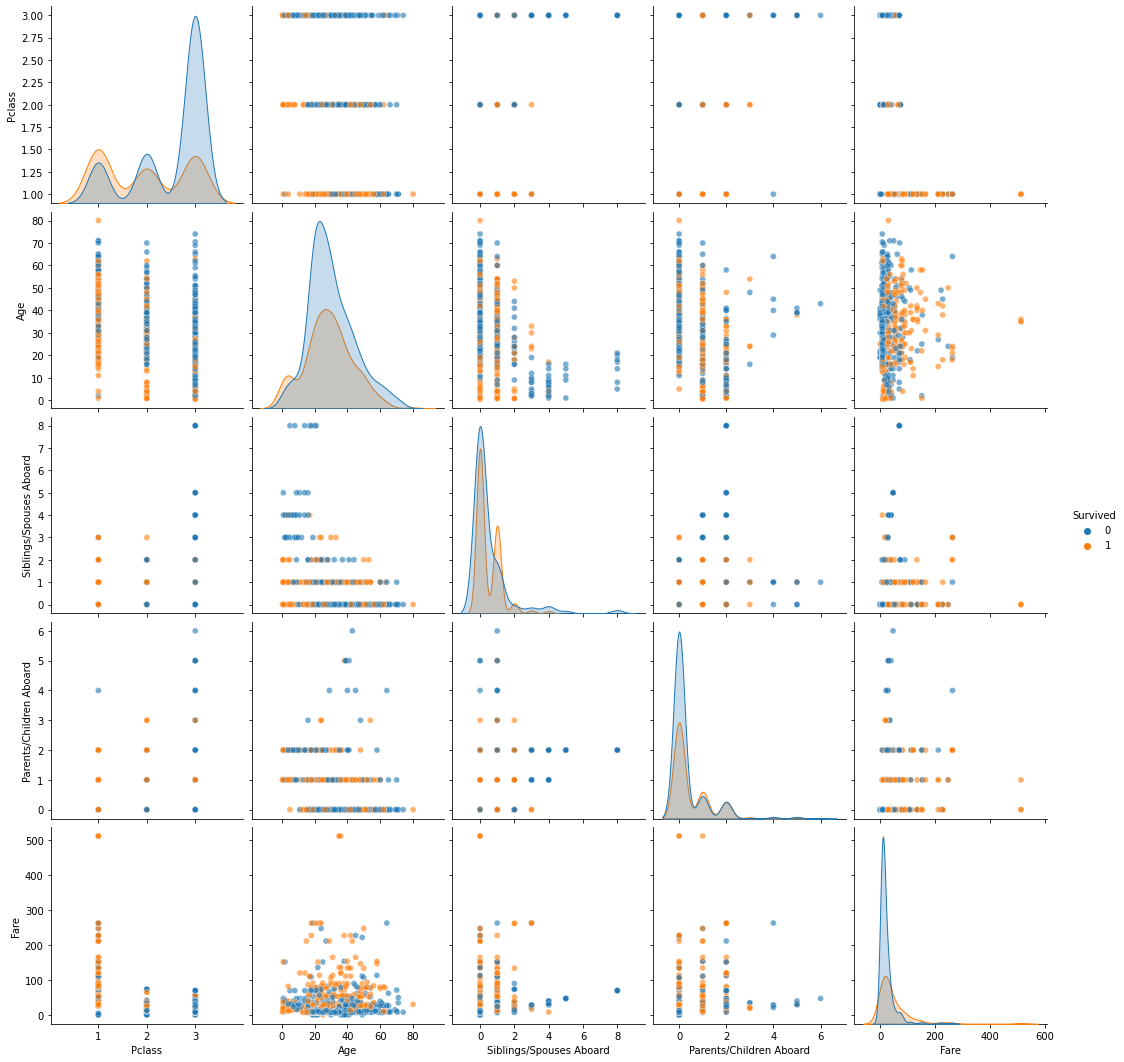

In [ ]:
sns.pairplot(df, hue="Survived", plot_kws={'alpha':0.6}, size=3)

## Задание 10
Теперь мы лучше видим концентрацию точек, давайте посмотрим более детально на разрез возраст/класс/пол пассажира.

Сделайте FacetGrid в разбиении по Pclass. 

Вы можете найти полезным вот [этот материал](https://nagornyy.me/courses/data-science/intro-to-seaborn/#facet-grid)

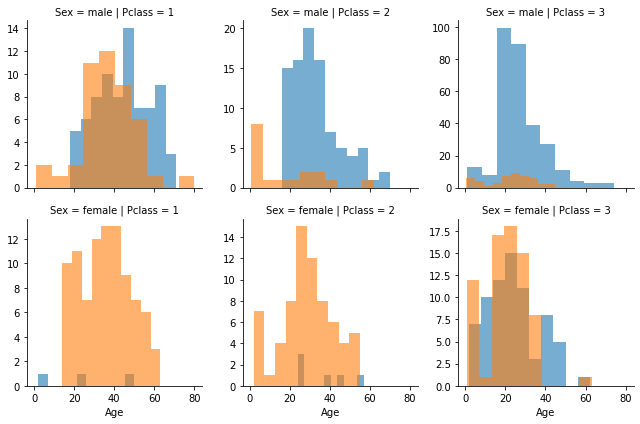

In [ ]:
g = sns.FacetGrid(df, col='Pclass', row='Sex', hue='Survived', sharex=True, sharey=False)
g = g.map(plt.hist, 'Age', alpha=0.6)

## Задание 11
Постройте еще какой-нибудь интересный по вашему мнению график, приведенный в материале выше. Объясните почему вы построили именно его.

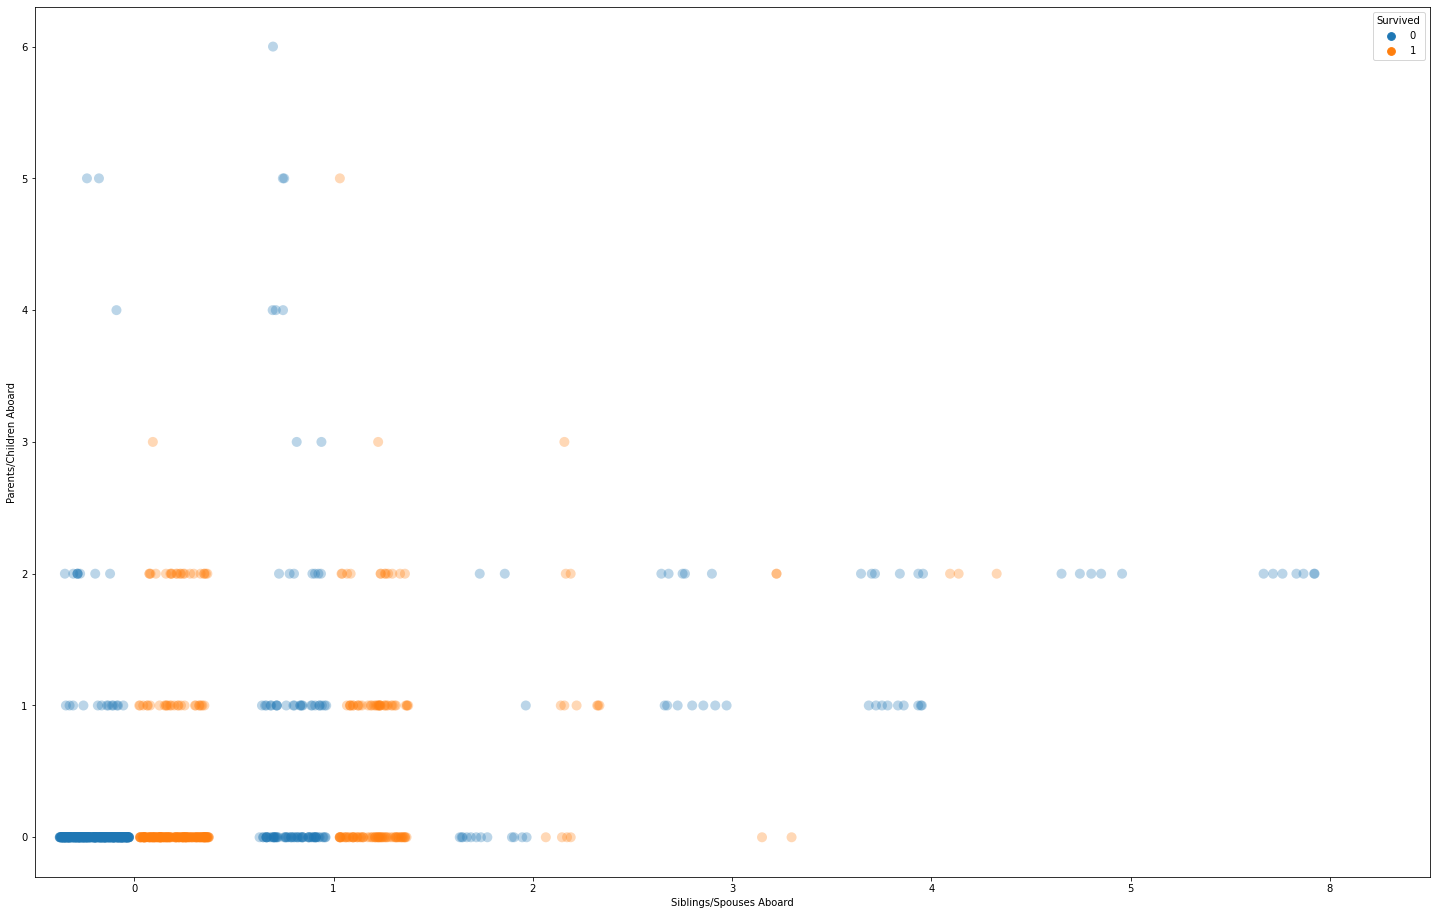

In [ ]:
plt.figure(figsize=(25, 16))
g = sns.stripplot(data=df, x='Siblings/Spouses Aboard', y='Parents/Children Aboard', hue='Survived', dodge=True, alpha=0.3, size=10, jitter=0.35)
# Хотел посмотреть распределение количества родственников на корабле среди выживших и погибших людей

## Задание 12
Постройте сводную таблицу (pivot_table), отражающую долю выживших, класс пассажира и его пол, используя groupby + unstack

In [ ]:
df2 = df.copy()
#df2.unstac
grouped = df.groupby(['Pclass', 'Sex'])['Survived'].mean()
grouped.unstack(level=1)

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.137026


## Задание 13
Постройте сводную таблицу (pivot_table), отражающую долю выживших, класс пассажира и его пол, используя метод pivot_table

In [ ]:
pd.pivot_table(df, values='Survived', index='Pclass', columns='Sex')

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.137026


## Задание 14
Попробуйте найти еще какой-нибудь фактор выживаемости с помощью доступных вам сейчас методов. 

Т.е, используя выборки, аггрегацию, графики

In [ ]:
pd.pivot_table(df, values='Survived', index='Parents/Children Aboard', columns='Sex')
# Многодетные семьи реже выживали

Sex,female,male
Parents/Children Aboard,,
0,0.788660,0.166667
1,0.766667,0.327586
2,0.612245,0.322581
3,0.750000,0.000000
4,0.000000,0.000000
5,0.250000,0.000000
6,0.000000,NaN
